# HYPOTHESIS TESTING LABS

It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

Set up the hypothesis test.
Write down all the steps followed for setting up the test.
Calculate the test statistic by hand and also code it in Python. It should be 4.76190. What decision can you make based on this calculated value?

In [12]:
## LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

In [24]:
## PARAMETERS
pop_mean = 120
sample_size = 100
sample_mean = 130.1
std = 21.21

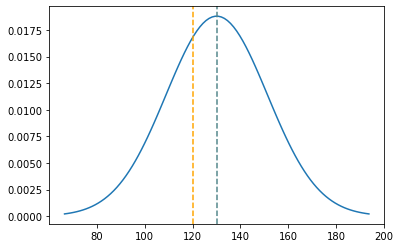

In [25]:
## PLOT THE DISTRIB. 
distr = np.linspace(sample_mean - 3*std, sample_mean + 3*std, 100)
plt.plot(x, stats.norm.pdf(distr, sample_mean, std))
plt.axvline(x=pop_mean, color='orange', ls='--', lw=1.5, label='axvline - % of full height')
plt.axvline(x=sample_mean, color='#53868B', ls='--', lw=1.5, label='axvline - % of full height')
plt.show()

In [26]:
t = (sample_mean - pop_mean)/(std/math.sqrt(sample_size))
t

4.761904761904759

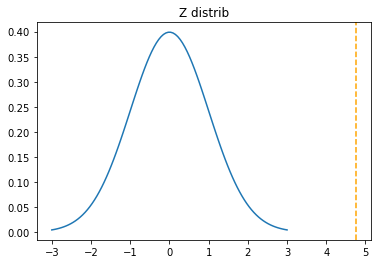

In [29]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("Z distrib")
plt.axvline(x=t, color='orange', ls='--', lw=1.5, label='axvline - % of full height')
plt.show()

In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file Data/machine.txt. Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other

In [66]:
import os 
import pandas as pd
import scipy
from scipy.stats import ttest_ind

In [67]:
os.chdir("C:/Users/tomma/Documents/data_science/berlin/TommasoLaboratories/data/labs")
df = pd.read_csv('ttest.txt', sep=" ", header=0, skipinitialspace=True )
df

,New_Machine\t,Old_Machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


In [68]:
sample_size = len(df.index)
mean_0 = df.iloc[1].mean()
mean_A = df.iloc[0].mean()
std_0 = df.iloc[1].std()
std_A = df.iloc[0].std()
print("Mean Old Machine: ", mean_0, "/nstd_0, mean_A, std_A)

SyntaxError: EOL while scanning string literal (1903210454.py, line 6)

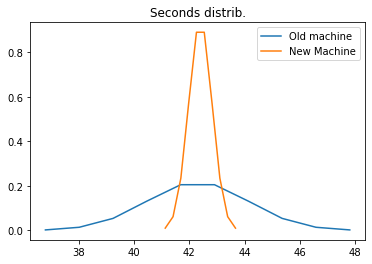

In [69]:
distr_0 = np.linspace(mean_0 - 3*std_0, mean_0 + 3*std_0, sample_size)
distr_A = np.linspace(mean_A - 3*std_A, mean_A + 3*std_A, sample_size)

plt.plot(distr_0, stats.norm.pdf(distr_0, mean_0, std_0))
plt.plot(distr_A, stats.norm.pdf(distr_A, mean_A, std_A))
plt.title("Seconds distrib.")
plt.legend(['Old machine', 'New Machine']);
plt.show()

In [79]:
t = scipy.stats.ttest_ind(df.iloc[1], df.iloc[0], equal_var=False, alternative='two-sided', trim=0)
print("T val =", t.statistic, "\nP val= ", t.pvalue)

T val = -0.07495316889959248 
P val=  0.9514621308158215
